In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [188]:
df = pd.read_csv("/kaggle/input/dataset-csp/dataset-csp.csv")

In [189]:
print(df.columns)

Index(['ph', 'max_temperature_avg', 'humidity_avg', 'precip_avg', 'soil_type',
       'area_slope', 'drainage', 'target'],
      dtype='object')


In [190]:
df.head()

,ph,max_temperature_avg,humidity_avg,precip_avg,soil_type,area_slope,drainage,target
0,4.5,29.0,45.0,1200,sandy soil,20,yes,cassava
1,4.5,29.0,65.0,1100,sandy soil,15,yes,cassava
2,4.5,30.0,60.0,1500,sandy soil,25,yes,cassava
3,4.5,30.0,30.0,1400,sandy soil,14,yes,cassava
4,4.5,27.0,45.0,1200,sandy soil,13,yes,cassava


In [191]:
# Display basic statistics
print(df.describe())

               ph  max_temperature_avg  humidity_avg   precip_avg  area_slope
count  253.000000           252.000000    252.000000   253.000000  253.000000
mean     5.971146            30.753968     63.063492  1571.936759    8.418972
std      1.061145             3.396005     18.291681   299.276581    6.069567
min      4.000000            27.000000     20.000000   900.000000    1.000000
25%      5.000000            28.000000     55.000000  1400.000000    4.000000
50%      6.000000            30.000000     65.000000  1500.000000    6.000000
75%      6.500000            33.000000     75.000000  1800.000000   12.000000
max      8.000000            40.000000    100.000000  2500.000000   30.000000


# **Data Visualization**

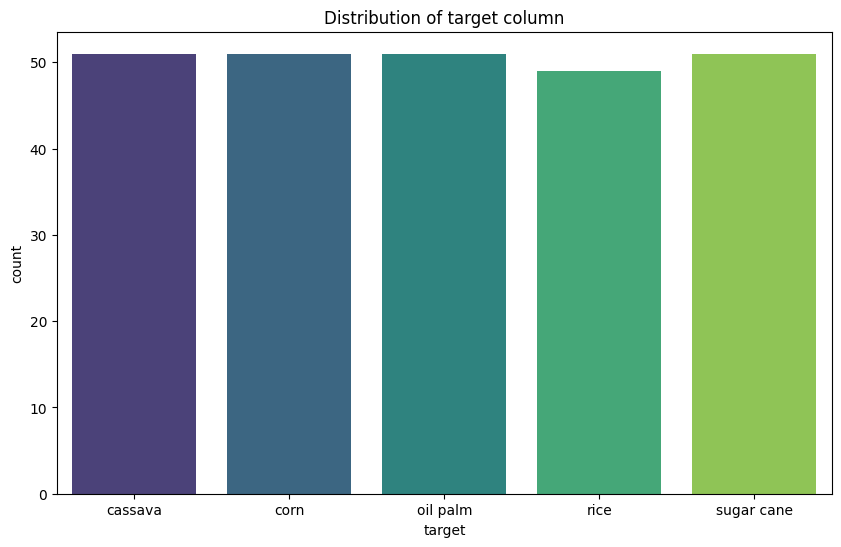

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette='viridis')  # 'viridis' is a color palette, you can choose other palettes
plt.title('Distribution of target column')
plt.show()

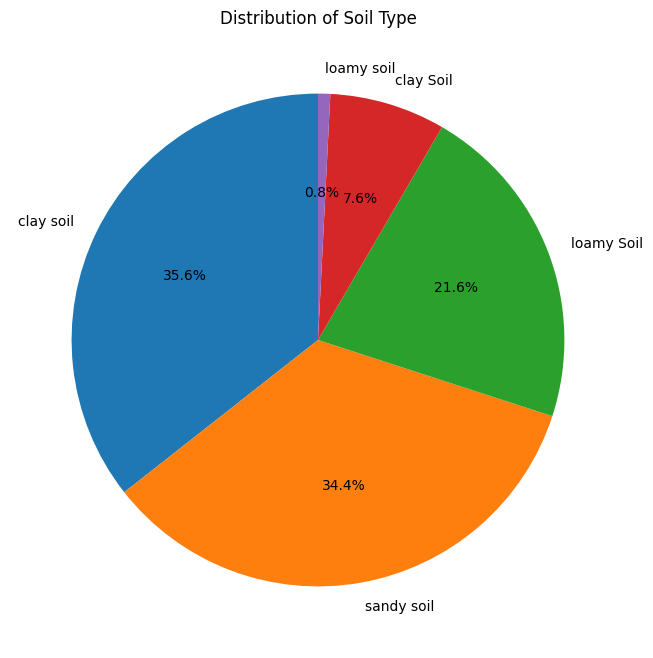

In [193]:
category_counts = df['soil_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Soil Type')
plt.show()

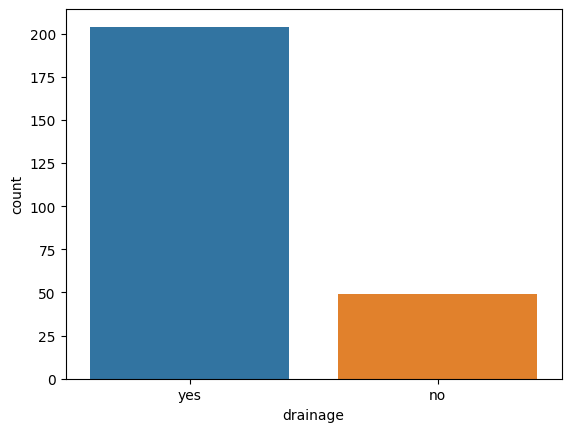

In [194]:
sns.countplot(x='drainage', data=df)
axes[0, 1].set_title('Distribution of Drainage Types')
plt.show()

# **Data Preprocessing**

In [195]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ph                   253 non-null    float64
 1   max_temperature_avg  252 non-null    float64
 2   humidity_avg         252 non-null    float64
 3   precip_avg           253 non-null    int64  
 4   soil_type            250 non-null    object 
 5   area_slope           253 non-null    int64  
 6   drainage             253 non-null    object 
 7   target               253 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.9+ KB


In [196]:
# Remove rows with missing values

df = df.dropna()

In [197]:
#Label Encoding 

encoder = LabelEncoder()
df['soil_type_encoded'] = encoder.fit_transform(df['soil_type'])
df['drainage_encoded'] = encoder.fit_transform(df['drainage'])
df['target_encoded'] = encoder.fit_transform(df['target'])

In [198]:
# After label encoding the categorical values

df.head()

,ph,max_temperature_avg,humidity_avg,precip_avg,soil_type,area_slope,drainage,target,soil_type_encoded,drainage_encoded,target_encoded
0,4.5,29.0,45.0,1200,sandy soil,20,yes,cassava,4,1,0
1,4.5,29.0,65.0,1100,sandy soil,15,yes,cassava,4,1,0
2,4.5,30.0,60.0,1500,sandy soil,25,yes,cassava,4,1,0
3,4.5,30.0,30.0,1400,sandy soil,14,yes,cassava,4,1,0
4,4.5,27.0,45.0,1200,sandy soil,13,yes,cassava,4,1,0


In [199]:
# Drop the unwanted columns

c = ['soil_type', 'drainage', 'target']
df_pp = df.drop(columns=c)
df_pp.head()

,ph,max_temperature_avg,humidity_avg,precip_avg,area_slope,soil_type_encoded,drainage_encoded,target_encoded
0,4.5,29.0,45.0,1200,20,4,1,0
1,4.5,29.0,65.0,1100,15,4,1,0
2,4.5,30.0,60.0,1500,25,4,1,0
3,4.5,30.0,30.0,1400,14,4,1,0
4,4.5,27.0,45.0,1200,13,4,1,0


# **Model Training**

In [200]:
X = df_pp.drop('target_encoded', axis=1)
y = df_pp['target_encoded']

In [201]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Create Random Forest model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [203]:
# Create SVM model

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [204]:
# Create Logistic Regression model

lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [205]:
# Create Gradient Boosting Model

xb_model = XGBClassifier(random_state=42)
xb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [206]:
# Making predictions

y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_lg = lg_model.predict(X_test)
y_pred_xb = xb_model.predict(X_test)

# **Model Evaluation**

In [207]:
# Evaluate Random Forest model

accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Accuracy : ",accuracy_rf)
print(class_report_rf)

Accuracy :  0.96
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00         7
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00        11
           4       0.92      1.00      0.96        12

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [208]:
# Evaluate SVM model

accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print("Accuracy : ",accuracy_svm)
print(class_report_svm)

Accuracy :  0.22
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.21      0.71      0.32         7
           2       0.23      0.86      0.36         7
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        12

    accuracy                           0.22        50
   macro avg       0.09      0.31      0.14        50
weighted avg       0.06      0.22      0.10        50



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
class_report_lg = classification_report(y_test, y_pred_lg)
print("Accuracy : ",accuracy_lg)
print(class_report_lg)

Accuracy :  0.7
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.46      0.86      0.60         7
           2       0.50      0.43      0.46         7
           3       0.90      0.82      0.86        11
           4       0.86      0.50      0.63        12

    accuracy                           0.70        50
   macro avg       0.70      0.69      0.67        50
weighted avg       0.74      0.70      0.70        50



In [210]:
accuracy_xb = accuracy_score(y_test, y_pred_xb)
class_report_xb = classification_report(y_test, y_pred_xb)
print("Accuracy : ",accuracy_xb)
print(class_report_xb)

Accuracy :  0.96
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      1.00      1.00         7
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        11
           4       0.92      1.00      0.96        12

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



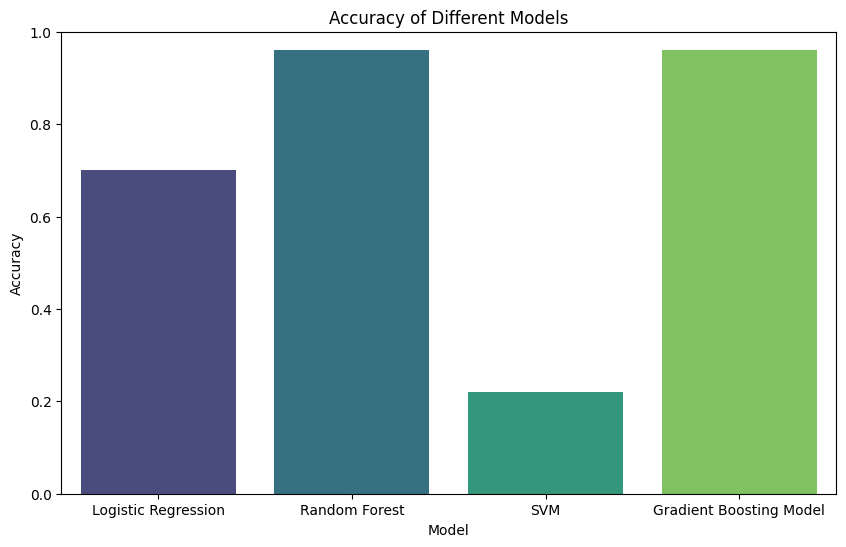

In [212]:
# Example: List of tuples with model names and accuracies
accuracies = [('Logistic Regression', accuracy_lg),
              ('Random Forest', accuracy_rf),
              ('SVM', accuracy_svm),
              ('Gradient Boosting Model', accuracy_xb)]

# Convert accuracies to DataFrame
accuracy_df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')  # 'viridis' is a color palette, you can choose other palettes
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()

In [213]:
# Save the model to a file
joblib.dump(model, 'model.joblib')

NameError: name 'joblib' is not defined